# English Dataset Analysis
In this notebook, we examine the English dataset.

In [2]:
import pandas as pd
df = pd.read_csv('../data/data_en.csv', index_col=0)
df

,text,created_at,lang
id,,,
1529697654334115842,Hybe successfully take the spotlight from Gar...,2022-05-26 05:35:15+00:00,en
1529697612659470336,jnklaina Im literally shock as well IDK if it...,2022-05-26 05:35:05+00:00,en
1529697533580427265,GIVEAWAY SPECIAL TH ANNIVERSARY SEVENTEEN CAR...,2022-05-26 05:34:47+00:00,en
1529697452336369664,Thank god hybe doesnt gaf about yalls ridicul...,2022-05-26 05:34:27+00:00,en
1529697307616088064,Tae got mad during that time when mfs invaded...,2022-05-26 05:33:53+00:00,en
...,...,...,...
1532341295099875335,Who cares,2022-06-02 12:40:08+00:00,en
1532335139920830464,Garam bullyGaram out Hybe,2022-06-02 12:15:41+00:00,en
1532294848891731968,I love listening to lies when I know the truth.,2022-06-02 09:35:35+00:00,en


In [3]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

df['compound'] = [analyzer.polarity_scores(x)['compound'] for x in df['text']]
df['neg'] = [analyzer.polarity_scores(x)['neg'] for x in df['text']]
df['neu'] = [analyzer.polarity_scores(x)['neu'] for x in df['text']]
df['pos'] = [analyzer.polarity_scores(x)['pos'] for x in df['text']]

df

,text,created_at,lang,compound,neg,neu,pos
id,,,,,,,
1529697654334115842,Hybe successfully take the spotlight from Gar...,2022-05-26 05:35:15+00:00,en,0.6124,0.000,0.800,0.200
1529697612659470336,jnklaina Im literally shock as well IDK if it...,2022-05-26 05:35:05+00:00,en,-0.1363,0.164,0.691,0.145
1529697533580427265,GIVEAWAY SPECIAL TH ANNIVERSARY SEVENTEEN CAR...,2022-05-26 05:34:47+00:00,en,0.5319,0.000,0.832,0.168
1529697452336369664,Thank god hybe doesnt gaf about yalls ridicul...,2022-05-26 05:34:27+00:00,en,0.2732,0.191,0.458,0.351
1529697307616088064,Tae got mad during that time when mfs invaded...,2022-05-26 05:33:53+00:00,en,-0.4939,0.118,0.882,0.000
...,...,...,...,...,...,...,...
1532341295099875335,Who cares,2022-06-02 12:40:08+00:00,en,0.4588,0.000,0.250,0.750
1532335139920830464,Garam bullyGaram out Hybe,2022-06-02 12:15:41+00:00,en,0.0000,0.000,1.000,0.000
1532294848891731968,I love listening to lies when I know the truth.,2022-06-02 09:35:35+00:00,en,0.5719,0.172,0.429,0.399


The compound score is a metric that calculates the sum of all the ratings which have been normalized between -1 (most extreme negative) and +1 (most extreme positive).
- **positive sentiment** : compound score greater than 0.05
- **neutral sentiment** : compound score between -0.05 and 0.05
- **negative sentiment** : compound score less than -0.05

Let's examine the distribution of sentiment.

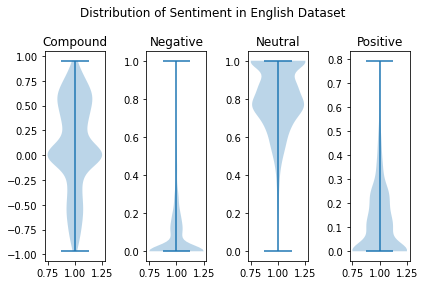

In [10]:
import matplotlib.pyplot as plt

# Extract Figure and Axes instance
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4)

# Create plots showing distribution
ax1.violinplot(df.compound)
ax1.set_title('Compound')

ax2.violinplot(df.neg)
ax2.set_title('Negative')

ax3.violinplot(df.neu)
ax3.set_title('Neutral')

ax4.violinplot(df.pos)
ax4.set_title('Positive')

# Display settings
fig.suptitle('Distribution of Sentiment in English Dataset')
fig.tight_layout()
plt.show()

In [5]:
# Visualize the most commonet keywords in the dataset
keywords = df['text'].str.split().apply(pd.Series.value_counts).sum(axis=0)

# Turn the series into a dataframe.
keywords = keywords.to_frame()
keywords.columns = ['count']

# Set the first column to the index.
keywords = keywords.reset_index()

# Rename the index column to 'keyword'
keywords = keywords.rename(columns={'index': 'keyword'})

# Remove all instances with count > 3, which are insignificant.
keywords = keywords[keywords['count'] > 3]

# Remove non-English keywords.
keywords = keywords[keywords['keyword'].str.contains('[a-zA-Z]')]

# # Remove irrelevant, common English keywords.
# keywords = keywords[~keywords['keyword'].isin(['the', 'and', 'to', 
#                                                 'is', 'a', 'of', 
#                                                 'for', 'that', 'I', 
#                                                 'in', 'on', 'this', 
#                                                 'with', 'are', 'they', 
#                                                 'you', 'it', 'be'])]

# Sort by descending count.
keywords = keywords.sort_values('count', ascending=False)

keywords

,keyword,count
0,the,466.0
90,to,382.0
1,and,279.0
117,is,241.0
55,hybe,227.0
...,...,...
2145,fucked,4.0
2179,dragging,4.0
2212,denying,4.0
1051,esp,4.0


<AxesSubplot:title={'center':'Keywords in English dataset'}, xlabel='keyword'>

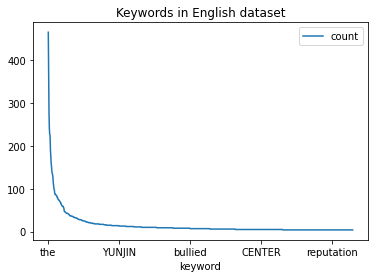

In [11]:
# Create a scatterplot of the keywords.
keywords.plot.line(x='keyword', y='count', title='Keywords in English dataset') #, figsize=(10, 10))

As we can see, the word frequency plot seems to follow Zipf's law.